#**More Projects**

Nội dung: Các thuật toán Supervised ( Regression,Decision Tree, Random Forest , SVM, KNN).

##**Predict Used Car price**

        Predict Used Car price (Linear – Polynomial Regression )


### EDA & Preprocessing

#### Attribute Information:
Attribute: Attribute Range

      1. symboling: -3, -2, -1, 0, 1, 2, 3.
      2. normalized-losses: continuous from 65 to 256.
      3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,
      isuzu, jaguar, mazda, mercedes-benz, mercury,
      mitsubishi, nissan, peugot, plymouth, porsche,
      renault, saab, subaru, toyota, volkswagen, volvo

      4. fuel-type: diesel, gas.
      5. aspiration: std, turbo.
      6. num-of-doors: four, two.
      7. body-style: hardtop, wagon, sedan, hatchback, convertible.
      8. drive-wheels: 4wd, fwd, rwd.
      9. engine-location: front, rear.
      10. wheel-base: continuous from 86.6 120.9.
      11. length: continuous from 141.1 to 208.1.
      12. width: continuous from 60.3 to 72.3.
      13. height: continuous from 47.8 to 59.8.
      14. curb-weight: continuous from 1488 to 4066.
      15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
      16. num-of-cylinders: eight, five, four, six, three, twelve, two.
      17. engine-size: continuous from 61 to 326.
      18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
      19. bore: continuous from 2.54 to 3.94.
      20. stroke: continuous from 2.07 to 4.17.
      21. compression-ratio: continuous from 7 to 23.
      22. horsepower: continuous from 48 to 288.
      23. peak-rpm: continuous from 4150 to 6600.
      24. city-mpg: continuous from 13 to 49.
      25. highway-mpg: continuous from 16 to 54.
      26. **price: continuous from 5118 to 45400.**

####Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Completed!')

Completed!


In [ ]:
#Read in data
linkdata1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df1 = pd.read_csv(linkdata1 ,names=['symboling', 'normalized-losses','make','fuel-type','aspiration','num-of-doors'
                                             ,'body-style','drive-wheels','engine-location','wheel-base','length',
                                             'width','height','curb-weight','engine-type','num-of-cylinders','engine-size',
                                             'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm',
                                             'city-mpg','highway-mpg','price'],header=None)
print('Completed!')

Completed!


In [ ]:
df1.info()  #26 columns, 205 entries, non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df1.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* Columns: normalized-losses	
Có giá trị null: ?

 Missing data : ?

In [ ]:
#Replace ? to nan values and check the data
df1.replace("?", np.nan, inplace = True)
df1[df1['normalized-losses'].isnull()]
#41 missing values in normalized-losses column

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [ ]:
# Check missing values:
def missing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = 100 * (df.isnull().sum()/len(df))
  missing_colums = pd.concat([total,percent],axis =1,keys =['số lượng missing','%missing'])
  return missing_colums

In [ ]:
missing_values(df1)

,số lượng missing,%missing
normalized-losses,41,20.00000
price,4,1.95122
stroke,4,1.95122
bore,4,1.95122
peak-rpm,2,0.97561
num-of-doors,2,0.97561
horsepower,2,0.97561
engine-type,0,0.00000
highway-mpg,0,0.00000
city-mpg,0,0.00000


####7 Columns have Missing values:

      + normalized-losses:	20%
      + price:   1.95%
      + stroke:  1.95%
      + bore:	 1.95%
      + peak-rpm:	 0.97%
      + num-of-doors:	 0.97% biến rời rạc
      + horsepower:   0.97%

In [ ]:
#Calculate Mean values of 6 Columns that have NaN values 
cols = ['normalized-losses', 'price','stroke','bore','peak-rpm','horsepower']
df1[cols] = df1[cols].astype("float")
print("Average of normalized-losses:","%.2f" % df1["normalized-losses"].mean(axis=0))
print("Average of stroke:","%.3f" % df1['stroke'].mean(axis=0))
print("Average of bore:","%.3f" % df1['bore'].mean(axis=0))
print("Average of peak-rpm:","%.3f" % df1['peak-rpm'].mean(axis=0))
print("Average of horsepower:","%.3f" % df1['horsepower'].mean(axis=0))

Average of normalized-losses: 122.00
Average of stroke: 3.255
Average of bore: 3.330
Average of peak-rpm: 5125.369
Average of horsepower: 104.256


In [ ]:
#Replace NaN with Mean
df1["normalized-losses"].replace(np.nan, "%.3f" % df1["normalized-losses"].mean(axis=0), inplace = True)
df1["stroke"].replace(np.nan, "%.3f" % df1['stroke'].mean(axis=0), inplace = True)
df1["bore"].replace(np.nan, "%.3f" % df1['bore'].mean(axis=0), inplace = True)
df1["peak-rpm"].replace(np.nan, "%.3f" % df1['peak-rpm'].mean(axis=0), inplace = True)
df1["horsepower"].replace(np.nan, "%.3f" % df1['horsepower'].mean(axis=0), inplace = True)
print('Completed!')

Completed!


In [ ]:
#Check unique of column num-of-door
df1['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [ ]:
#Fill the missing values for the categorical terms - mode :
df1['num-of-doors'] = df1['num-of-doors'].fillna(df1['num-of-doors'].mode()[0])

In [ ]:
#Check again:
df1['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
#Drop NaN values of Price column: (Drop NaN Price values due to being NaN dependent variables)
df1.dropna(subset = ["price"], axis = 0, inplace = True)

In [ ]:
df1.reset_index(drop=True,inplace=True)
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
#Recheck data types
df1.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
#Convert numerical variables to numerical data types
df1[cols] = df1[cols].astype('float')

In [ ]:
#Recheck data types
df1.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
df1.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
#Describe numerical variables
df1.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330697,3.256866,10.164279,103.405532,5117.665363,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365699,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Analyst Supervised Learning

In [ ]:
#Find the correlation among the columns in the Dataframe
df1.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.008199,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055022,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.158033,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123964,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188824,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.060617,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167445,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205963,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,0.001260,0.566939,-0.267357,-0.582051,-0.591330,0.543155
stroke,-0.008199,0.055022,0.158033,0.123964,0.188824,-0.060617,0.167445,0.205963,-0.055390,1.000000,0.187876,0.098263,-0.063611,-0.033921,-0.034606,0.082270


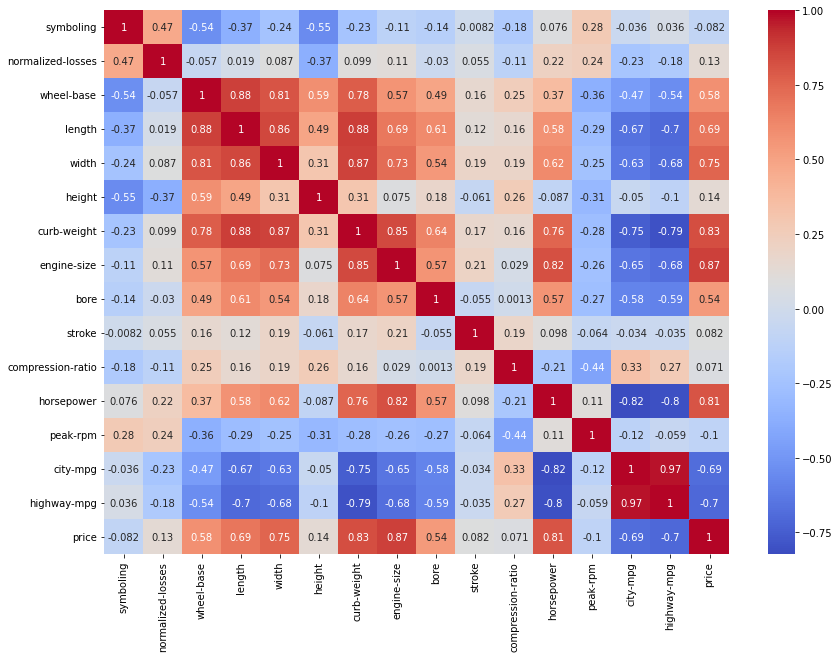

In [ ]:
#Import seaborn library:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(), annot = True, cmap= 'coolwarm')

In [ ]:
#Pick Columns that have correlation values > 0.5
cols50 = ['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg']

####LinearRegression

In [ ]:
#
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
#
y = df1['price'].values #Select colomn price for y data
X = df1[cols50]

In [ ]:
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [ ]:
#Build Linear model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Calculating Accuracy:
from sklearn.metrics import r2_score
Ac = r2_score(y_test, y_pred)
print('The accuracy of this model is: R-square = ',"{:.2f}".format(Ac))

The accuracy of this model is: R-square =  0.73


####Run the model with encrypted data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa các string
df1E = df1.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df1E

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,28,0,1,0,1,0,2,0,2,...,18,5,23,4,13,31,10,8,10,117
1,5,28,0,1,0,1,0,2,0,2,...,18,5,23,4,13,31,10,8,10,136
2,3,28,0,1,0,1,2,2,0,10,...,28,5,1,28,13,46,10,6,9,136
3,4,42,1,1,0,0,3,1,0,29,...,11,5,13,25,22,27,17,11,13,122
4,4,42,1,1,0,0,3,0,0,28,...,22,5,13,25,5,34,17,5,5,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,13,21,1,0,0,3,2,0,45,...,24,5,35,15,20,33,16,10,11,142
197,1,13,21,1,1,0,3,2,0,45,...,24,5,35,15,11,49,15,6,8,159
198,1,13,21,1,0,0,3,2,0,45,...,33,5,26,7,12,39,17,5,6,163
199,1,13,21,0,1,0,3,2,0,45,...,25,3,6,25,31,29,8,13,10,165


In [ ]:
#
y = df1['price'].values #Select colomn price for y data
X = df1[cols50]

In [ ]:
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [ ]:
#Build Linear model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Calculating Accuracy
from sklearn.metrics import r2_score
Ac=r2_score(y_test, y_pred)
print('The accuracy of this model is: R-square =',"{:.2f}".format(Ac))

The accuracy of this model is: R-square = 0.75


In [ ]:
#2 Min-MaxScaler (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler.fit(df1E)
data_minmax= scaler.transform(df1E)

In [ ]:
df1E_minmax = pd.DataFrame(data=data_minmax, columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine_type','number_of_cylinder','engine-size','fuel_sys','bore','stroke','compression-ratio','horsepower','peak-rpm','highway-mpg','city-mpg','price'])
df1E_minmax

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel_sys,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,1.0,0.56,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.039216,...,0.428571,0.714286,0.621622,0.111111,0.419355,0.534483,0.454545,0.285714,0.344828,0.632432
1,1.0,0.56,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.039216,...,0.428571,0.714286,0.621622,0.111111,0.419355,0.534483,0.454545,0.285714,0.344828,0.735135
2,0.6,0.56,0.000000,1.0,0.0,1.0,0.50,1.0,0.0,0.196078,...,0.666667,0.714286,0.027027,0.777778,0.419355,0.793103,0.454545,0.214286,0.310345,0.735135
3,0.8,0.84,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.568627,...,0.261905,0.714286,0.351351,0.694444,0.709677,0.465517,0.772727,0.392857,0.448276,0.659459
4,0.8,0.84,0.047619,1.0,0.0,0.0,0.75,0.0,0.0,0.549020,...,0.523810,0.714286,0.351351,0.694444,0.161290,0.586207,0.772727,0.178571,0.172414,0.794595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.2,0.26,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.882353,...,0.571429,0.714286,0.945946,0.416667,0.645161,0.568966,0.727273,0.357143,0.379310,0.767568
197,0.2,0.26,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.882353,...,0.571429,0.714286,0.945946,0.416667,0.354839,0.844828,0.681818,0.214286,0.275862,0.859459
198,0.2,0.26,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.882353,...,0.785714,0.714286,0.702703,0.194444,0.387097,0.672414,0.772727,0.178571,0.206897,0.881081
199,0.2,0.26,1.000000,0.0,1.0,0.0,0.75,1.0,0.0,0.882353,...,0.595238,0.428571,0.162162,0.694444,1.000000,0.500000,0.363636,0.464286,0.344828,0.891892


In [ ]:
#
y = df1E_minmax['price'].values 
X = df1E_minmax[cols50]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [ ]:
#Build Linear model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Calculate Accuracy
from sklearn.metrics import r2_score
Ac=r2_score(y_test, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 0.86


##**Predict Loan Pay Off**
        Predict Loan Pay Off ( Logistic Regression )

###EDA & Preprocessing:

####Attribute Information:

Attribute: Attribute Range

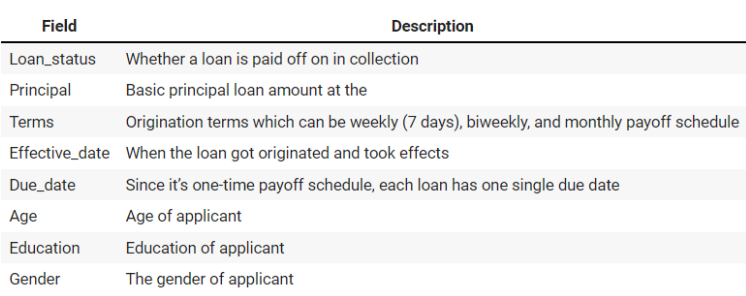

Loan_status: Payoff or Collection
Principal: Số tiền vay gốc
Terms: lịch thanh toán (30, 15, 7)
Efective_date: ngày bắt đầu hiệu lực
Due_date: lịch trả nợ 1 lần, mỗi khoản vay có 1 ngày duy nhất


####Import necessary library

In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau
print('Completed!')

Completed!


In [ ]:
#Read in data
linkdata2 = 'https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv'
dftrain = pd.read_csv(linkdata2)
#Read in test data 
linktestdata = 'https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_test.csv'
dftest = pd.read_csv(linktestdata)
print('Completed!')

Completed!


In [ ]:
df2 = pd.concat([dftrain, dftest], axis=0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      400 non-null    int64 
 1   Unnamed: 0.1    400 non-null    int64 
 2   loan_status     400 non-null    object
 3   Principal       400 non-null    int64 
 4   terms           400 non-null    int64 
 5   effective_date  400 non-null    object
 6   due_date        400 non-null    object
 7   age             400 non-null    int64 
 8   education       400 non-null    object
 9   Gender          400 non-null    object
dtypes: int64(5), object(5)
memory usage: 34.4+ KB


In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      54 non-null     int64 
 1   Unnamed: 0.1    54 non-null     int64 
 2   loan_status     54 non-null     object
 3   Principal       54 non-null     int64 
 4   terms           54 non-null     int64 
 5   effective_date  54 non-null     object
 6   due_date        54 non-null     object
 7   age             54 non-null     int64 
 8   education       54 non-null     object
 9   Gender          54 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [ ]:
dftest.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
dftrain.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:
df2 = df2.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
dftrain = dftrain.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
dftest = dftest.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df2

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
49,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
50,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
51,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
52,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male


In [ ]:
df2.describe()

,Principal,terms,age
count,400.00000,400.000000,400.000000
mean,939.75000,22.550000,31.060000
std,120.33761,8.100094,6.033441
min,300.00000,7.000000,18.000000
25%,800.00000,15.000000,27.000000
50%,1000.00000,30.000000,30.000000
75%,1000.00000,30.000000,35.000000
max,1000.00000,30.000000,51.000000


In [ ]:
# Check missing values:
def missing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = 100 * (df.isnull().sum()/len(df))
  missing_colums = pd.concat([total,percent],axis =1,keys =['số lượng missing','%missing'])
  return missing_colums

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 53
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     400 non-null    object
 1   Principal       400 non-null    int64 
 2   terms           400 non-null    int64 
 3   effective_date  400 non-null    object
 4   due_date        400 non-null    object
 5   age             400 non-null    int64 
 6   education       400 non-null    object
 7   Gender          400 non-null    object
dtypes: int64(3), object(5)
memory usage: 28.1+ KB


In [ ]:
missing_values(df2)

,số lượng missing,%missing
loan_status,0,0.0
Principal,0,0.0
terms,0,0.0
effective_date,0,0.0
due_date,0,0.0
age,0,0.0
education,0,0.0
Gender,0,0.0


Non missing data

###Analyst Supervised Learning

####Logistic Regression 

In [ ]:
df2.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [ ]:
#
df2['effective_date']= pd.to_datetime(df2['effective_date'])
df2['due_date']= pd.to_datetime(df2['due_date'])
#
dftrain['effective_date']= pd.to_datetime(dftrain['effective_date'])
dftrain['due_date']= pd.to_datetime(dftrain['due_date'])
#
dftest['effective_date']= pd.to_datetime(dftest['effective_date'])
dftest['due_date']= pd.to_datetime(dftest['due_date'])

In [ ]:
df2

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
49,COLLECTION,1000,30,2016-09-11,2016-10-10,32,High School or Below,male
50,COLLECTION,800,15,2016-09-11,2016-09-25,29,college,male
51,COLLECTION,1000,30,2016-09-11,2016-10-10,37,High School or Below,male
52,COLLECTION,800,15,2016-09-11,2016-09-25,36,High School or Below,male


Categorical attributes visualization

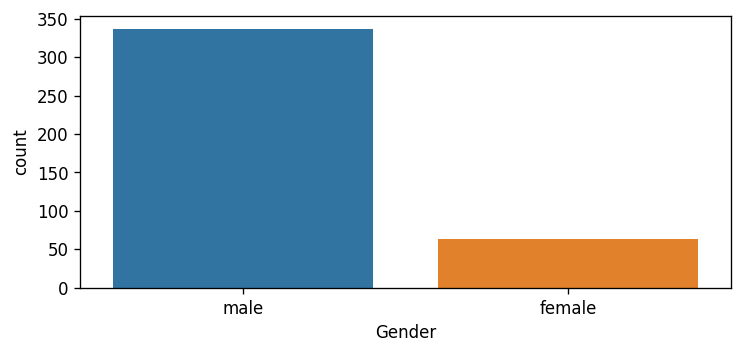

In [ ]:
sns.countplot(df2['Gender'])

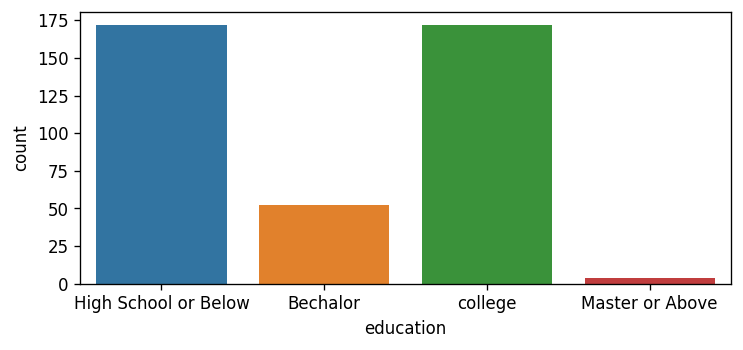

In [ ]:
sns.countplot(df2['education'])

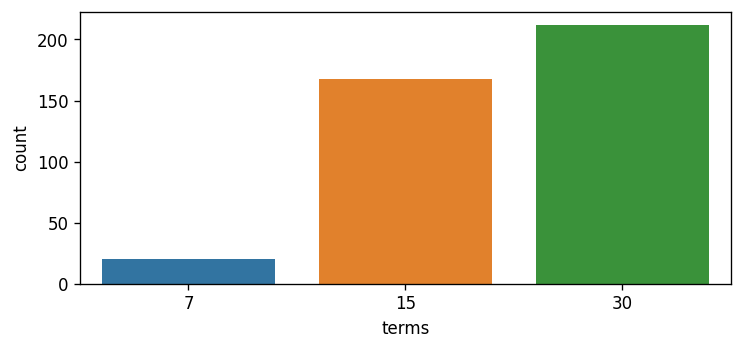

In [ ]:
sns.countplot(df2['terms'])

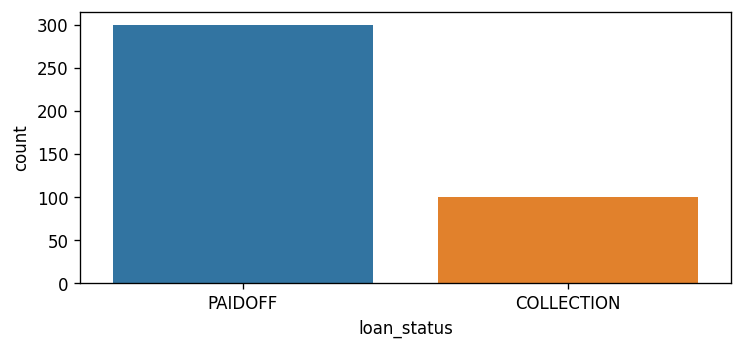

In [ ]:
sns.countplot(df2['loan_status'])

Numerical attributes visualization

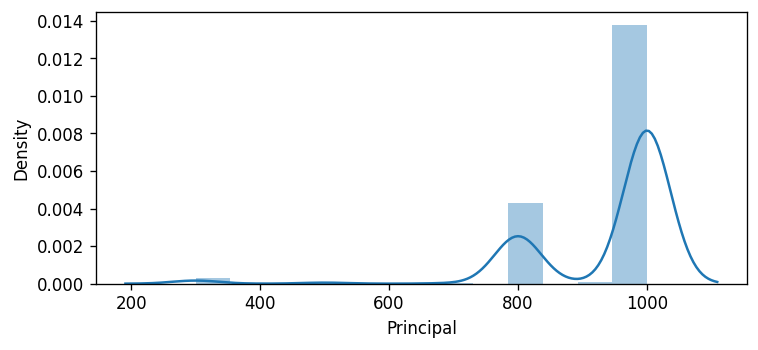

In [ ]:
sns.distplot(df2['Principal'])

Correlation matrix

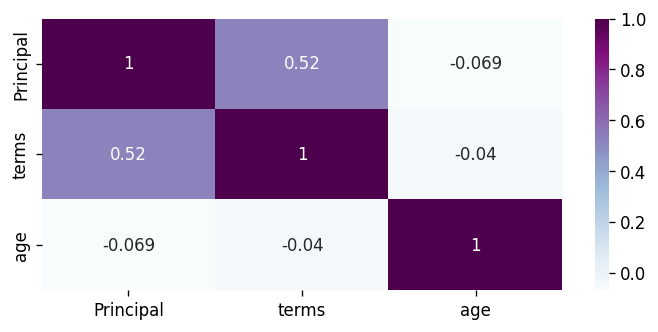

In [ ]:
corr =  df2.corr()
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [ ]:
df2.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [ ]:
#Date_gap function:
def date_gap(df):
  df['date_gap'] = df['due_date'].sub(df['effective_date'],axis=0)
  df['date_gap'] = df['date_gap'].astype('timedelta64[D]').astype(int)
  # shift column 'date_gap' to sixth position
  sixth_column = df.pop('date_gap')
  # insert column using insert(position,column_name,
  # position_column) function
  df.insert(5, 'date_gap', sixth_column)

In [ ]:
#date_gap column:
date_gap(df2)
date_gap(dftrain)
date_gap(dftest)

In [ ]:
df2.head()

,loan_status,Principal,terms,effective_date,due_date,date_gap,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,29,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,29,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,14,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,29,college,male


In [ ]:
dftrain.head()

,loan_status,Principal,terms,effective_date,due_date,date_gap,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,29,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,29,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,14,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,29,college,male


In [ ]:
#drop effective_date, due_date
df2 = df2.drop(columns=['effective_date','due_date'])
dftrain = dftrain.drop(columns=['effective_date','due_date'])
dftest = dftest.drop(columns=['effective_date','due_date'])

In [ ]:
df2.head()

,loan_status,Principal,terms,date_gap,age,education,Gender
0,PAIDOFF,1000,30,29,45,High School or Below,male
1,PAIDOFF,1000,30,29,33,Bechalor,female
2,PAIDOFF,1000,15,14,27,college,male
3,PAIDOFF,1000,30,29,28,college,female
4,PAIDOFF,1000,30,29,29,college,male


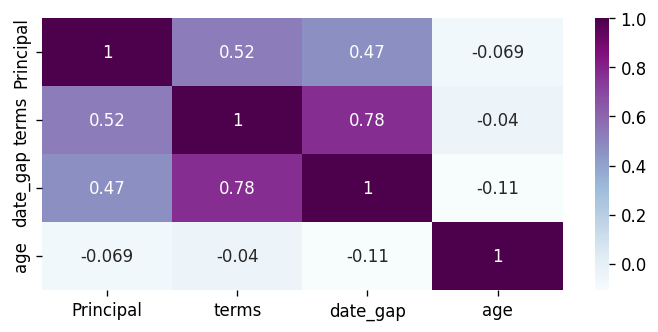

In [ ]:
corr =  df2.corr()
sns.heatmap(corr, annot = True, cmap = "BuPu")

####Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','education','loan_status']
le = LabelEncoder()
for col in cols:
  df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.head()

,loan_status,Principal,terms,date_gap,age,education,Gender
0,1,1000,30,29,45,1,1
1,1,1000,30,29,33,0,0
2,1,1000,15,14,27,3,1
3,1,1000,30,29,28,3,0
4,1,1000,30,29,29,3,1


In [ ]:
for col in cols:
  dftrain[col] = le.fit_transform(dftrain[col])

In [ ]:
for col in cols:
  dftest[col] = le.fit_transform(dftest[col])

In [ ]:
dftest.head()

,loan_status,Principal,terms,date_gap,age,education,Gender
0,1,1000,30,29,50,0,0
1,1,300,7,6,35,2,1
2,1,1000,30,29,43,1,0
3,1,1000,30,29,26,3,1
4,1,800,15,14,29,0,1


Train-Test split

In [ ]:
#Specify input and output attributes
#X = df2.drop(columns=['loan_status'], axis = 1)
#y = df2['loan_status'] 

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=5)
#random_state=number : to have the same train_test_split if we run again 

We have test data aldready

In [ ]:
#Specify input and output attributes(Test)
X_test = dftest.drop(columns=['loan_status'], axis = 1)
y_test = dftest['loan_status'] 

In [ ]:
#Specify input and output attributes(Train)
X_train = dftrain.drop(columns=['loan_status'], axis = 1)
y_train = dftrain['loan_status'] 

In [ ]:
#X, y
X = df2.drop(columns=['loan_status'], axis = 1)
y = df2['loan_status'] 

####Model Training

In [ ]:
#Classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
  model.fit(X_train, y_train)
  print('Accuracy is', model.score(X_test, y_test)*100)
  #cross validation - it is used for better validation of model
  # eg: cv-5, train-4, test-1
  score = cross_val_score(model, X, y, cv=5)
  print('Cross validation is', np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 74.07407407407408
Cross validation is 74.75


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 66.66666666666666
Cross validation is 57.00000000000001


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model= RandomForestClassifier()
classify(model, X, y)

Accuracy is 66.66666666666666
Cross validation is 63.0


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 70.37037037037037
Cross validation is 58.75


####Hyperparameter tuning

In [ ]:
model= RandomForestClassifier(n_estimators=55, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 74.07407407407408
Cross validation is 74.49999999999999


####Confusion Matrix
A confusion matrix is a summary of prediction rusults on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors thay are being made.

In [ ]:
model= RandomForestClassifier(n_estimators=55, min_samples_split=25, max_depth=7, max_features=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=1, min_samples_split=25,
                       n_estimators=55)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0, 14],
       [ 0, 40]])

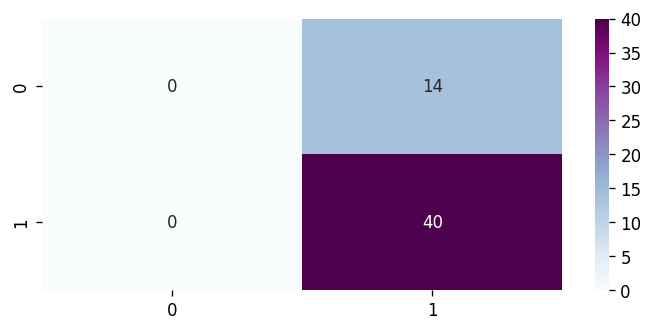

In [ ]:
sns.heatmap(cm, annot=True, cmap = "BuPu")

In [ ]:
print('Completed')

Completed


## **Predict Heart Disease**

###EDA & Preprocessing

####Attribute Information

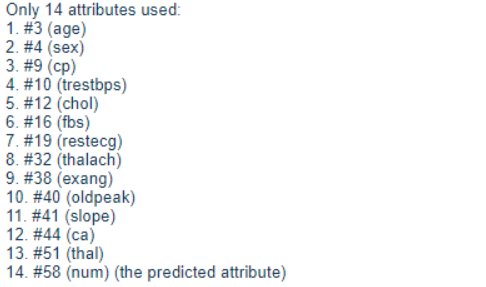

####Import necesary library 

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau
print('Completed!')

Completed!


In [ ]:
#Read in data
linkdata3 = 'https://raw.githubusercontent.com/maxtran1997gmail/Files/main/dataset_2190_cholesterol.csv'
df3 = pd.read_csv(linkdata3)
print('Completed!')

Completed!


In [ ]:
df3.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [ ]:
df3.shape

(303, 14)

In [ ]:
for col in df3.columns:
    print(col)

age
sex
cp
trestbps
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num
chol


In [ ]:
# shift column 'num' to first position
column_to_move = df3.pop("num")
# insert column with insert(location, column_name, column_value)
df3.insert(0, "num", column_to_move)

In [ ]:
# Check missing values:
def missing_values(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = 100 * (df.isnull().sum()/len(df))
  missing_colums = pd.concat([total,percent],axis =1,keys =['số lượng missing','%missing'])
  return missing_colums

In [ ]:
missing_values(df3)

,số lượng missing,%missing
num,0,0.0
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num       303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
df3['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [ ]:
df3['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [ ]:
#Replace ? to nan values and check the data
df3.replace("?", np.nan, inplace = True)

In [ ]:
#check NaN data again
missing_values(df3)

,số lượng missing,%missing
ca,4,1.320132
thal,2,0.660066
num,0,0.000000
age,0,0.000000
sex,0,0.000000
cp,0,0.000000
trestbps,0,0.000000
fbs,0,0.000000
restecg,0,0.000000
thalach,0,0.000000


In [ ]:
df3[df3['thal'].isnull()]

,num,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol
87,0,53,0,3,128,0,2,115,0,0.0,1,0,NaN,216
266,2,52,1,4,128,1,0,156,1,1.0,2,0,NaN,204


In [ ]:
df3[df3['ca'].isnull()]

,num,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol
166,0,52,1,3,138,0,0,169,0,0.0,1,NaN,3,223
192,1,43,1,4,132,1,2,143,1,0.1,2,NaN,7,247
287,0,58,1,2,125,0,0,144,0,0.4,2,NaN,7,220
302,0,38,1,3,138,0,0,173,0,0.0,1,NaN,3,175


In [ ]:
print(df3['thal'].mode()[0])
print(df3['ca'].mode()[0])

3
0


In [ ]:
#Fill the missing values for the categorical terms - mode :
df3['thal'] = df3['thal'].fillna(df3['thal'].mode()[0])
df3['ca'] = df3['ca'].fillna(df3['ca'].mode()[0])

In [ ]:
#Change the type of thal and ca columns
df3['thal'] = df3['thal'].astype(int)
df3['ca'] = df3['ca'].astype(int)

In [ ]:
#Statistical measures about data
df3.describe()

,num,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.937294,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,246.693069
std,1.228536,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,51.776918
min,0.000000,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,126.000000
25%,0.000000,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,211.000000
50%,0.000000,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,241.000000
75%,2.000000,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,275.000000
max,4.000000,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,564.000000


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num       303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###Analyst Supervised Learning

LogisticRegression; KNN; SVM;NaiveBayes; DecisionTree;RandomForest

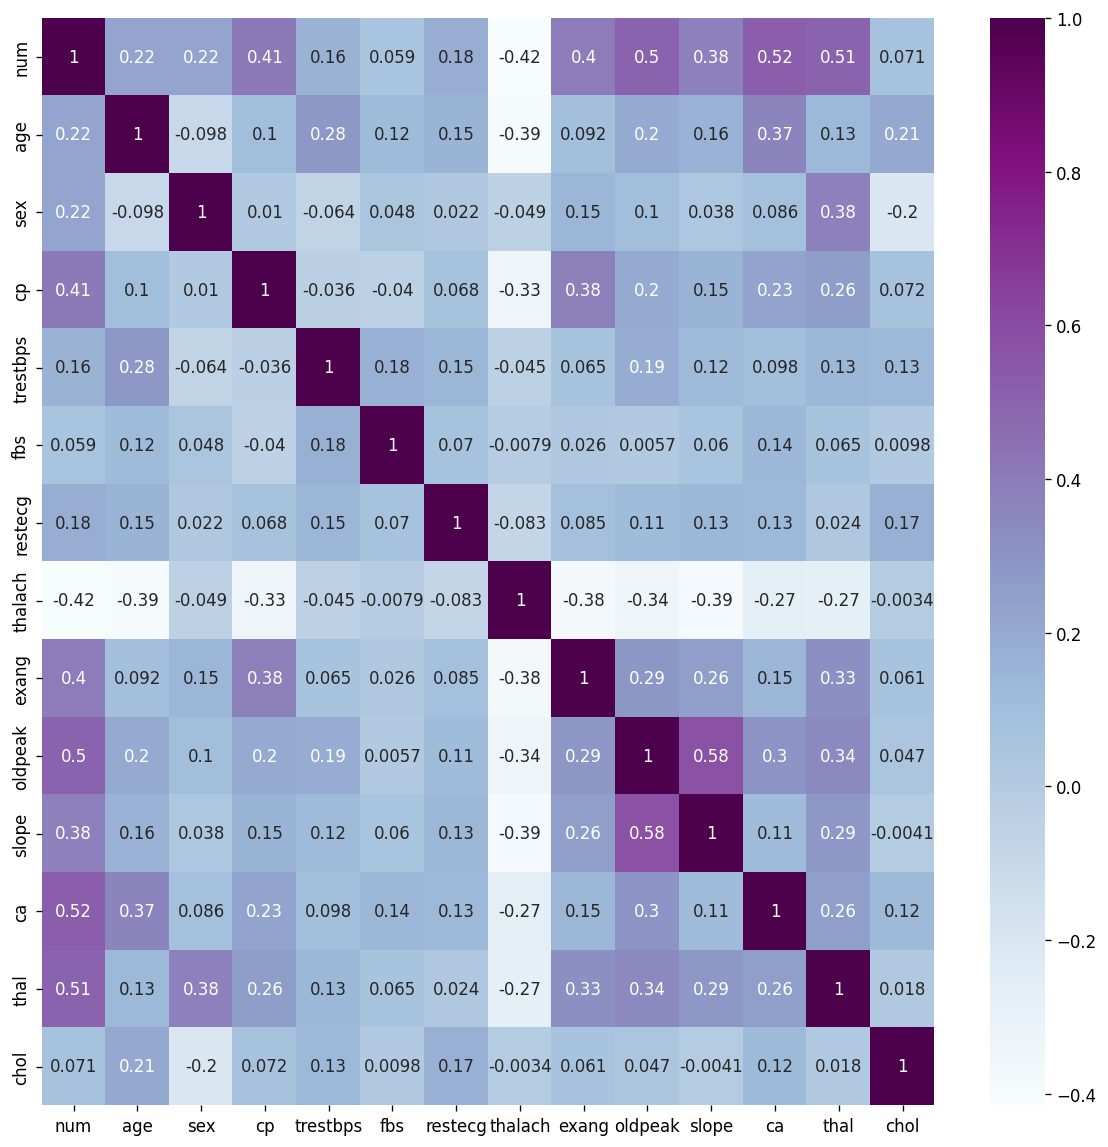

In [ ]:
#Find the correlation among the columns in the Dataframe
corr =  df3.corr()
plt.rcParams.update({'figure.figsize':(12,12), 'figure.dpi':120})
sns.heatmap(corr, annot = True, cmap = "BuPu")

####Train_Test_Split

In [ ]:
#Specify input and output attributes
X = df3.drop(columns=['num'],axis=1)
y = df3['num']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)
#random_state=number : use to have the same train_test_split if we run again 

In [ ]:
#Classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)
  model.fit(X_train, y_train)
  print('Accuracy is', model.score(X_test, y_test)*100)
  #cross validation - it is used for better validation of model
  # eg: cv-5, train-4, test-1
  score = cross_val_score(model, X, y, cv=5)
  print('Cross validation is', np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 67.3913043478261
Cross validation is 57.74863387978143


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 50.0
Cross validation is 48.18032786885246


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model= RandomForestClassifier()
classify(model, X, y)

Accuracy is 65.21739130434783
Cross validation is 57.40437158469944


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 63.04347826086957
Cross validation is 58.08196721311476


####Hyperparameter Tuning

In [ ]:
model= RandomForestClassifier(n_estimators=60, min_samples_split=10, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 67.3913043478261
Cross validation is 59.06557377049181


####Confusion Matrix

In [ ]:
model = LogisticRegression()
classify(model, X, y)

Accuracy is 67.3913043478261
Cross validation is 57.74863387978143


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  1,  0,  0,  0],
       [ 2,  3,  0,  1,  0],
       [ 3,  2,  0,  1,  0],
       [ 1,  1,  2,  1,  0],
       [ 0,  0,  0,  1,  0]])

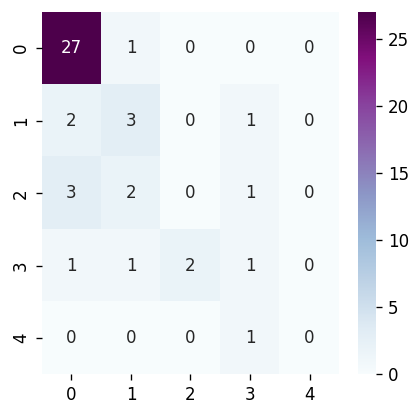

In [ ]:
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':120})
sns.heatmap(cm, annot=True, cmap = "BuPu")